# Volatility
- Different ways to look at it
- Here we will use: Average True Range (ATR)

### What is Volatility?
- Volatility has a number of different meanings
- We use it in relation to price movement
- Can be thought as the equivalent as risk

### Formula
$TR = \max[H − L, |H − C_P|, |L − C_P|]$

$ATR = \frac{1}{n}\sum_{i=1}^{n} TR_i$

- $TR_i$: A particular True Range
- $n$: The time period employed
- $H$: Current High
- $L$: Current Low
- $C_P$: Previous Close


In [21]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas as pd

In [22]:
data = pd.read_csv('USD_CAD_H4.csv')

In [23]:
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())

In [24]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [25]:
true_range = np.max(df, axis=1)

In [26]:
data['ATR_14'] = true_range.rolling(14).mean()

In [27]:
data.tail()

,Date,Time,Weekday,Weekday_Name,UTC_Time,Volume,Open,High,Low,Close,...,col_1,col_2,col_3,col_4,col_5,SMA_10,SMA_20,F_SMA_10,F_SMA_20,ATR_14
9653,2021-10-20,09:00:00,2,Wednesday,2021-10-20T09:00:00.000000000Z,3983,1.23472,1.23598,1.23347,1.23492,...,-0.00020,0.00126,0.00145,-0.00102,0.00155,1.235046,1.234982,-0.000126,-0.000062,0.002723
9654,2021-10-20,13:00:00,2,Wednesday,2021-10-20T13:00:00.000000000Z,6397,1.23489,1.23628,1.23150,1.23198,...,0.00291,0.00139,0.00048,-0.00020,-0.00102,1.234134,1.234544,-0.002154,-0.002564,0.002871
9655,2021-10-20,17:00:00,2,Wednesday,2021-10-20T17:00:00.000000000Z,3245,1.23194,1.23277,1.23074,1.23198,...,-0.00004,0.00083,0.00124,0.00291,-0.00020,1.233474,1.234245,-0.001494,-0.002265,0.002840
9656,2021-10-20,21:00:00,2,Wednesday,2021-10-20T21:00:00.000000000Z,1232,1.23204,1.23262,1.23144,1.23160,...,0.00044,0.00058,0.00016,-0.00004,0.00291,1.233044,1.234195,-0.001444,-0.002595,0.002574
9657,2021-10-21,01:00:00,3,Thursday,2021-10-21T01:00:00.000000000Z,2008,1.23162,1.23184,1.22882,1.22965,...,0.00197,0.00022,0.00083,0.00044,-0.00004,1.232026,1.233606,-0.002376,-0.003956,0.002661


In [10]:
true_range.rolling(14).sum()/14

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
9653    0.002723
9654    0.002871
9655    0.002840
9656    0.002574
9657    0.002661
Length: 9658, dtype: float64

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


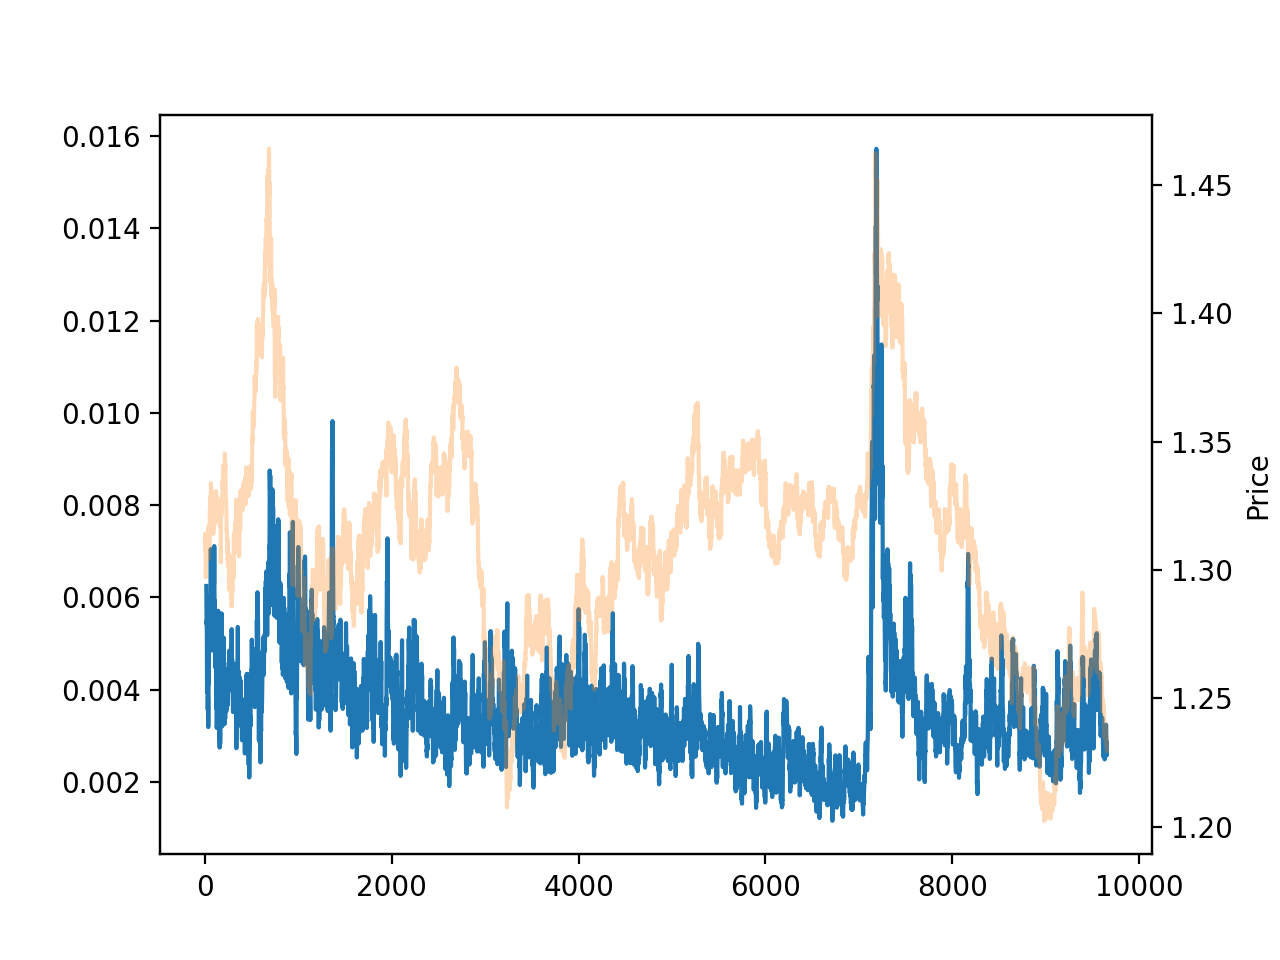

Text(0, 0.5, 'Price')

In [13]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")